In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys,gc
pd.set_option("max_columns",300)
pd.set_option("max_rows",300)

In [2]:
train = pd.read_csv("../input/train.csv")

In [3]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
st = pd.read_csv("../input/structures.csv")

In [5]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [6]:
train = train.merge(st, left_on=["molecule_name","atom_index_0"], right_on=["molecule_name","atom_index"], how="left")
train = train.merge(st, left_on=["molecule_name","atom_index_1"], right_on=["molecule_name","atom_index"], how="left")

In [7]:
train.drop(["atom_index_x","atom_index_y"], axis=1, inplace=True)
train.rename(
    columns = {
        "x_x":"x_0",
        "y_x":"y_0",
        "z_x":"z_0",
        "x_y":"x_1",
        "y_y":"y_1",
        "z_y":"z_1",
        "atom_x":"atom_0",
        "atom_y":"atom_1"
    },
    inplace=True
)

In [8]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [9]:
train["dist"] = np.linalg.norm(train[["x_0","y_0","z_0"]].values - train[["x_1","y_1","z_1"]].values, axis=1)

In [10]:
train["dist"].max()

3.9243539514947825

[]

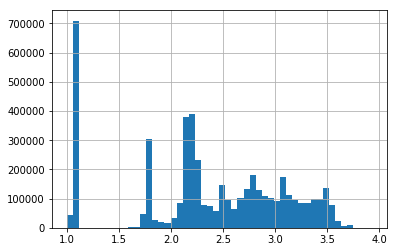

In [11]:
train["dist"].hist(bins=50).plot()